In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
print(cv2.__version__)
import os
import shutil

4.11.0


In [2]:
# Cargar una imagen
directorio = 'data/DibujosNPT/'
name1 = 'N_328_THS_TOTAL-ev1-h.png'
name2 = 'N_307_GLS_TOTAL-ev5-h.png'
path1 = directorio + name1
path2 = directorio + name2 
image1 = cv2.imread(path1)
image2 = cv2.imread(path2)

In [3]:
def show_hist(img, max_val=250, save=False, directory='', name='', roi = None):
    # Convertir a gris si es BGR
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img

    # Crear máscara para limitar blancos
    mask = gray <= max_val

    # Calcular histograma solo con los píxeles válidos
    hist_full = cv2.calcHist([gray], [0], mask.astype('uint8'), [256], [0, 256])

    """# Transformada de Fourier del histograma
    f = np.fft.fft(hist_full)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)"""

    plt.figure(figsize=(15,9))

    plt.subplot(231)
    plt.imshow(gray, cmap='gray')
    plt.axis('off')

    plt.subplot(232), plt.plot(hist_full)
    plt.title("Histograma")
    plt.xlim([-1,256+1])

    """# Magnitud de la FFT del histograma
    plt.subplot(223)
    plt.plot(magnitude_spectrum)
    plt.title("Transformada del histograma (magnitud)")"""

    # Espectro logarítmico para más claridad
    plt.subplot(233)
    plt.plot(20*np.log(hist_full+1))
    plt.title("Histograma (escala log)")

    if roi is None:
        pass
    else:
        if len(img.shape) == 3:
            gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        else:
            gray = roi

        # Crear máscara para limitar blancos
        mask = gray <= max_val
        # Crear máscara para limitar blancos
        mask = gray <= max_val

        # Calcular histograma solo con los píxeles válidos
        hist_full = cv2.calcHist([gray], [0], mask.astype('uint8'), [256], [0, 256])

        """# Transformada de Fourier del histograma
        f = np.fft.fft(hist_full)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = np.abs(fshift)"""

        plt.subplot(234)
        plt.imshow(gray, cmap='gray')
        plt.axis('off')

        plt.subplot(235), plt.plot(hist_full)
        plt.title("Histograma roi")
        plt.xlim([-1,256+1])
        # Espectro logarítmico para más claridad
        plt.subplot(236)
        plt.plot(20*np.log(hist_full+1))
        plt.title("Histograma (escala log)")

    if save:
        plt.savefig(directory + '/' + name + '.png', bbox_inches="tight")
    plt.show()

In [4]:
# Crear una copia para aplicar los filtros de forma acumulativa
image_improved = image2.copy()
img_name = 'image2'

In [5]:
if os.path.exists(img_name):
    shutil.rmtree(img_name) #borramos la carpeta
os.makedirs(img_name, exist_ok=True)

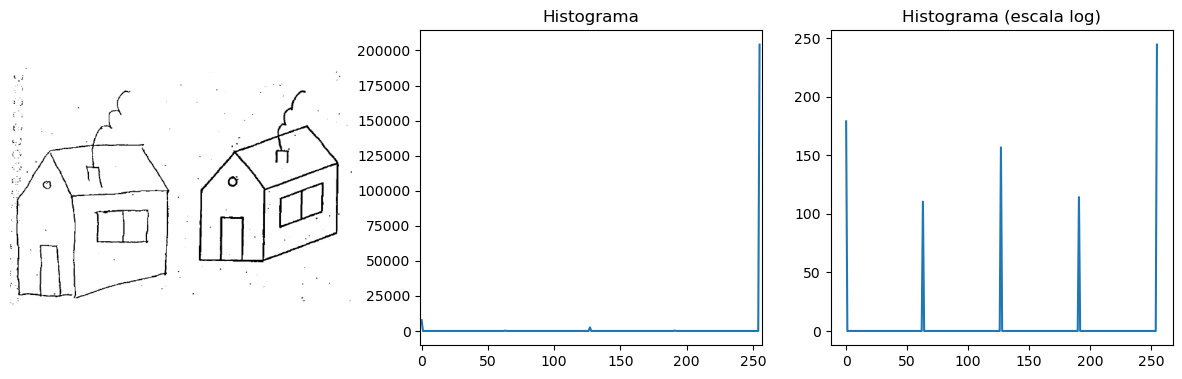

In [6]:
#en primer lugar vemos histogramas
show_hist(image_improved, max_val=256, save=True, directory=img_name, name='histograma')

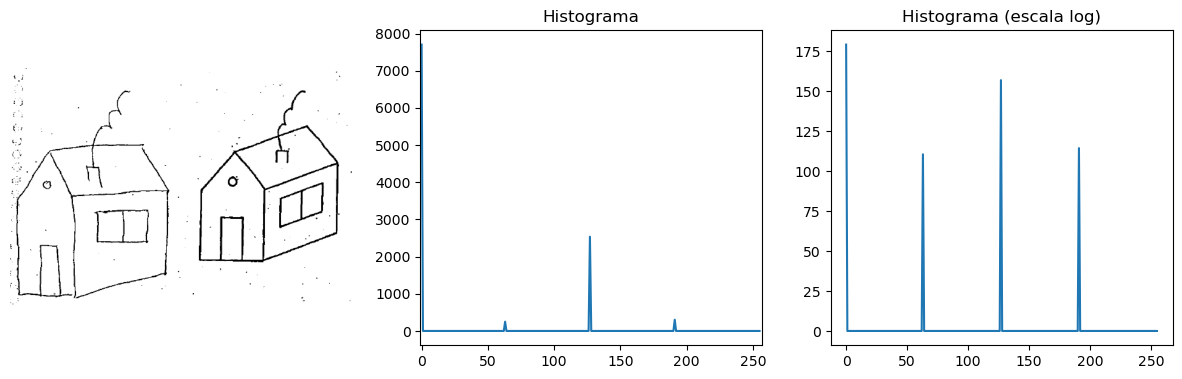

In [7]:
show_hist(image_improved, max_val=250, save=True, directory=img_name, name='histograma_sinBlancos')

In [8]:
if len(image_improved.shape) == 3:
    gray = cv2.cvtColor(image_improved, cv2.COLOR_BGR2GRAY)
else:
    gray = image_improved

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


Filtro seleccionado: g (Gaussian)
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


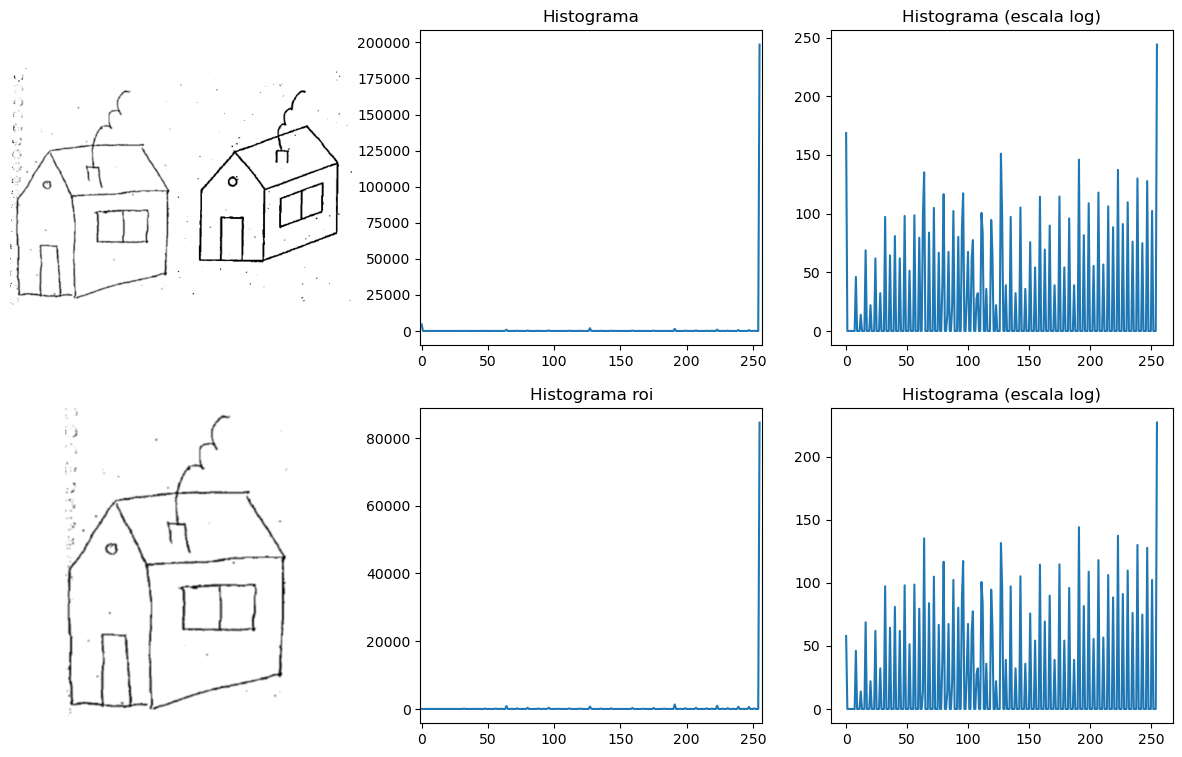

Filtro seleccionado: m (Mediana)
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


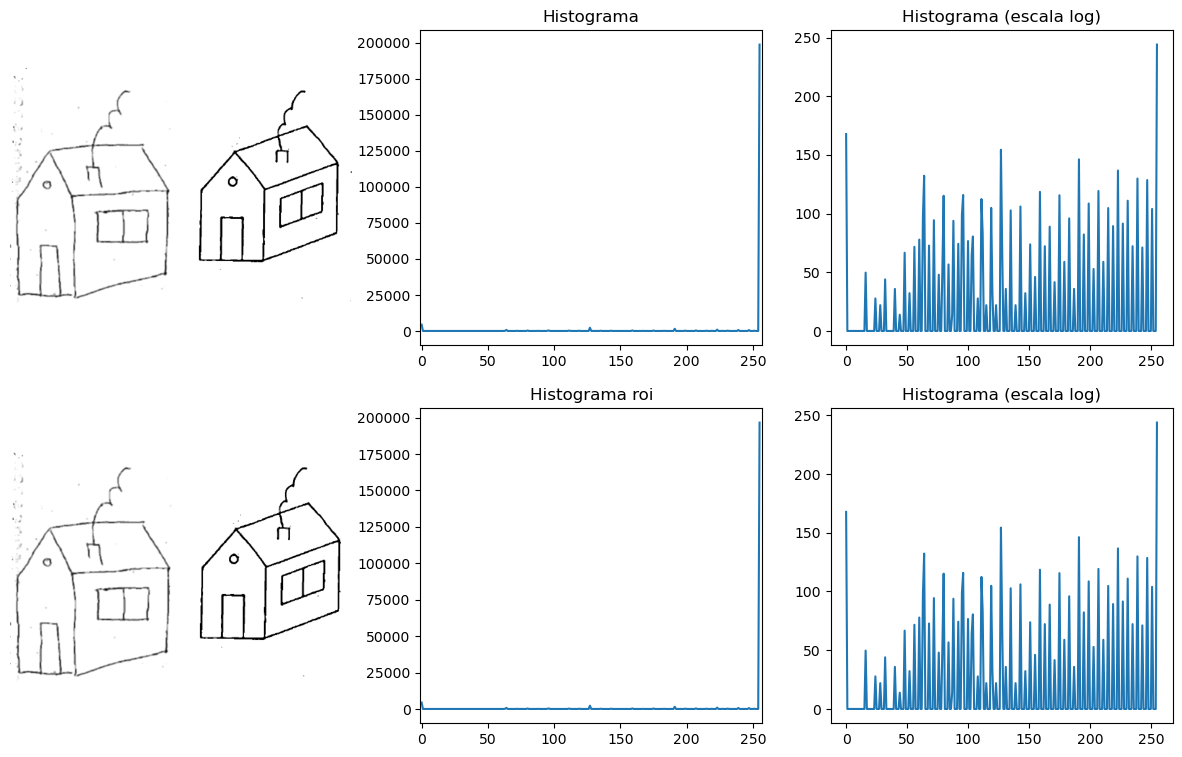

Filtro seleccionado: m (Mediana)
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


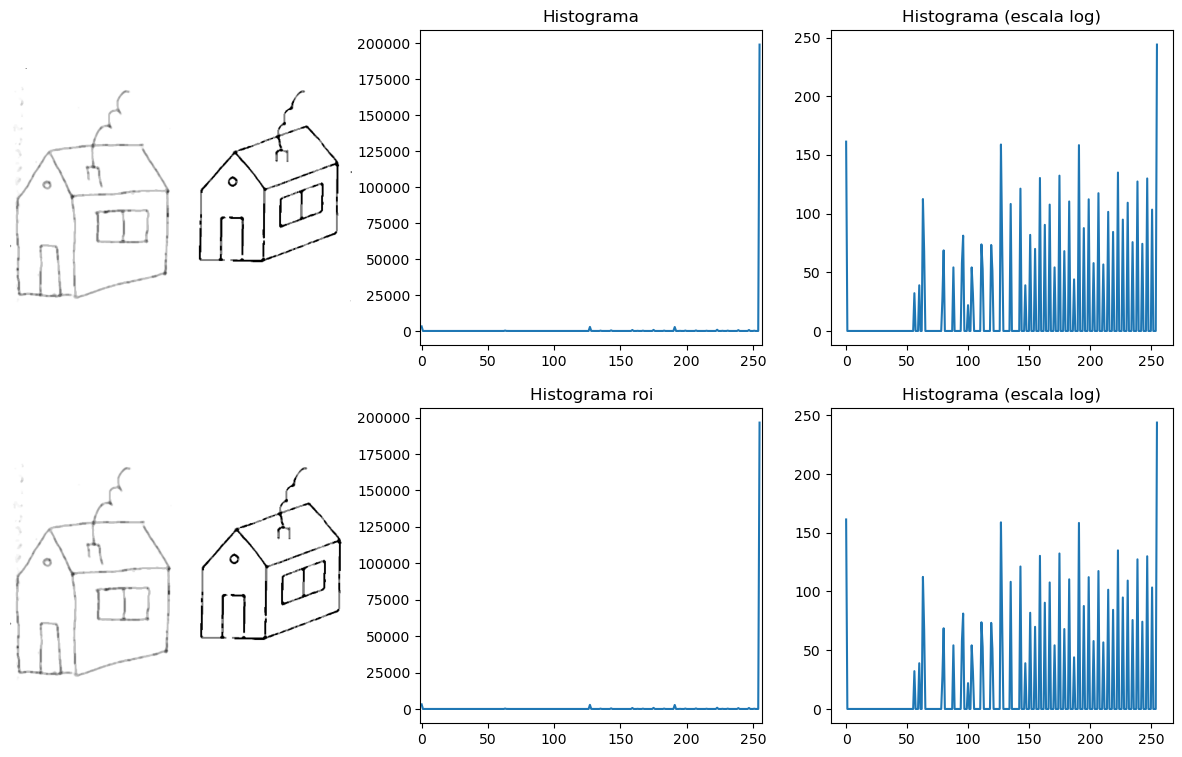

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


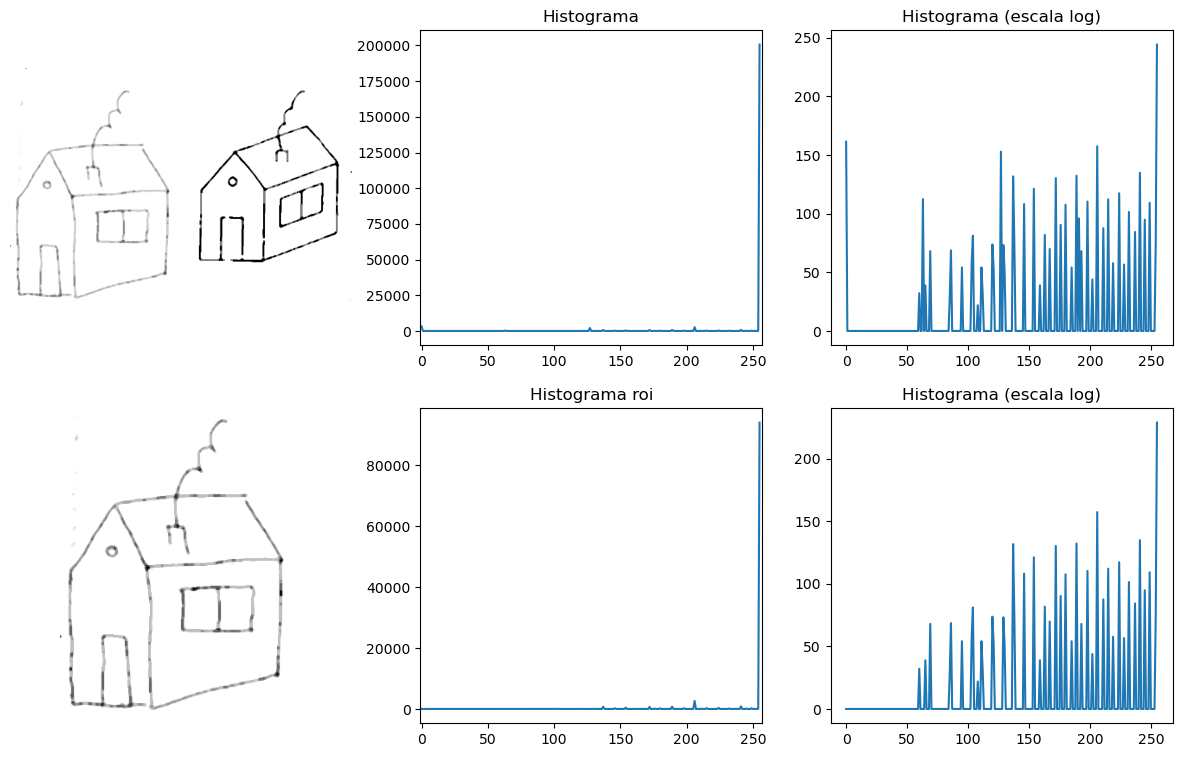

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


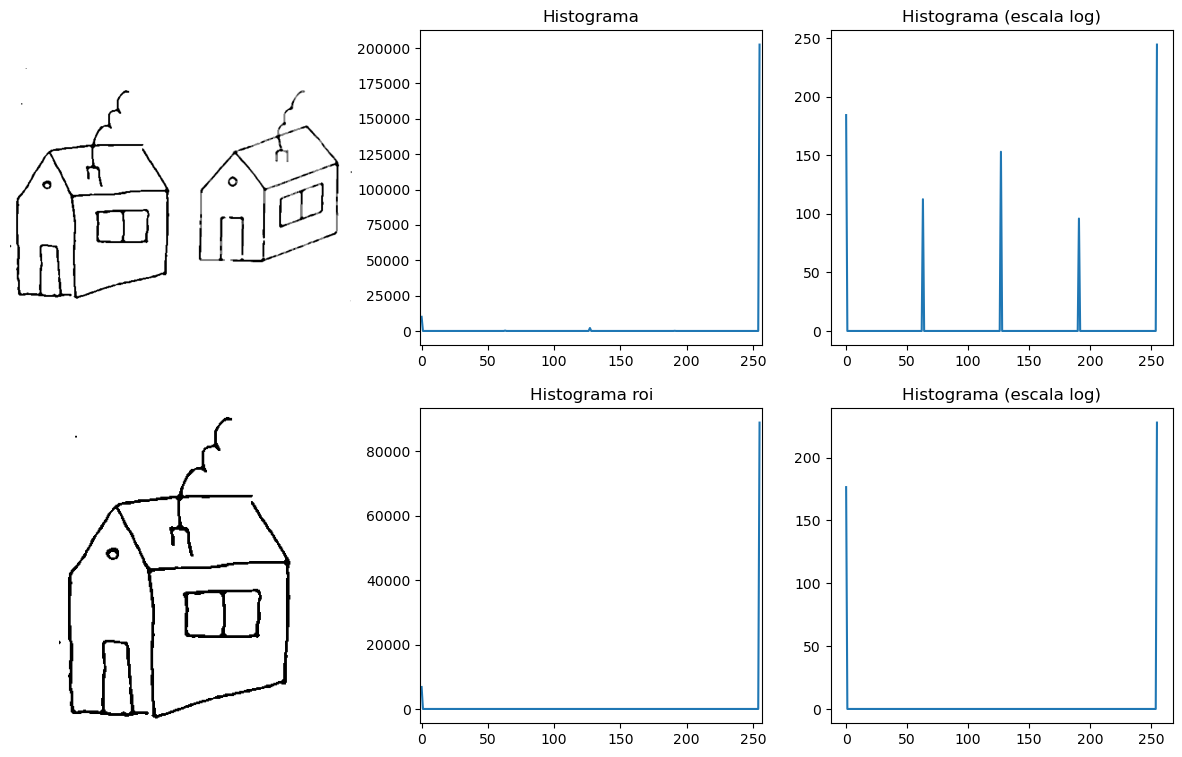

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


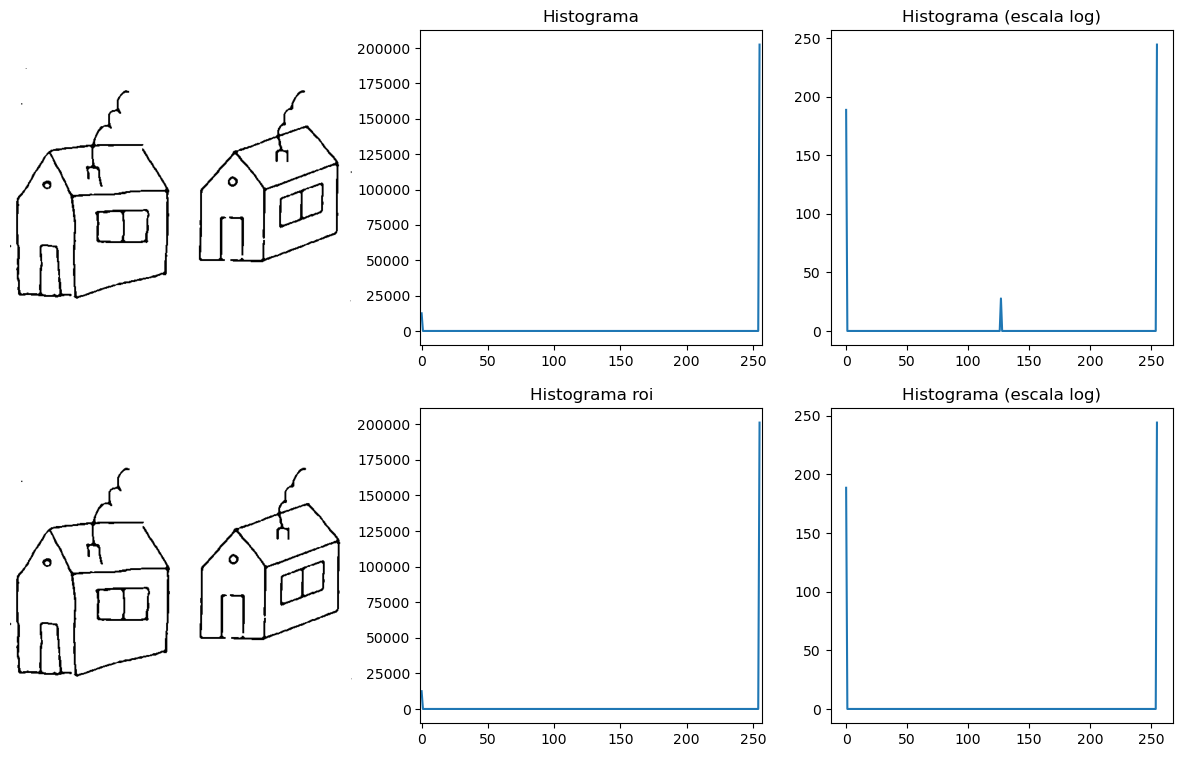

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


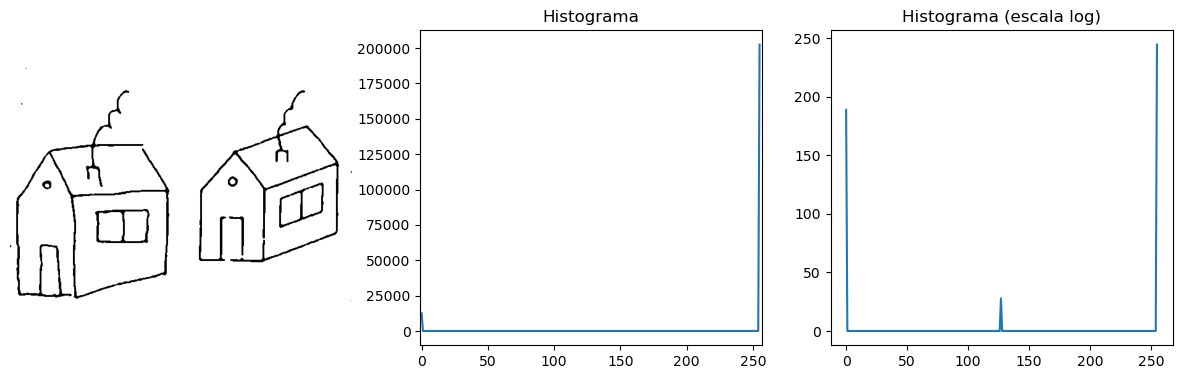

In [9]:
# Variables para almacenar el tamaño del kernel y las ROIs
kernel_size = 3 # Valor inicial del tamaño del kernel
contrast_threshold = 50
thresh_value = 127
background_fill = np.median(np.median(gray))
rois = []  # Lista para almacenar las zonas seleccionadas

img_directory = img_name + '/img'
img_new_name = img_name

cv2.imwrite(img_directory + img_new_name +'_base.jpg', image_improved)

val_max = 256
# Función para actualizar el filtro cuando se cambia el tamaño del kernel
def update_filter(val):
    global kernel_size
    # Asegurarse de que el tamaño del kernel sea impar
    kernel_size = val if val % 2 != 0 else val + 1

def update_contrast(val):
    global contrast_threshold
    contrast_threshold = val

def update_umbral(val):
    global thresh_value
    # Asegurarse de que el tamaño del kernel sea impar
    thresh_value = val


def apply_umbral_threshold(image_roi, thresh_value):
    if len(image_roi.shape) == 3:
        gray = cv2.cvtColor(image_roi, cv2.COLOR_BGR2GRAY)
    else:
        gray = image_roi
    
    _, trunc = cv2.threshold(gray, thresh_value, background_fill, cv2.THRESH_BINARY)
    
    # Volvemos a color para pegar en la imagen global
    trunc_bgr = cv2.cvtColor(trunc, cv2.COLOR_GRAY2BGR)
    return trunc_bgr

# Función para ajustar el contraste con un threshold
def adjust_contrast(threshold, image_improved):
    if len(image_improved.shape) == 3:
        image_gray = cv2.cvtColor(image_improved, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image_improved
    image_equalized = cv2.equalizeHist(image_gray)

    # Calcular el valor de ganancia (contraste)
    alpha = threshold / 50  # Escala el valor del threshold (rango ajustable)
    
    # Ajustar el contraste: I' = alpha * I + beta
    image_contrasted = cv2.convertScaleAbs(image_gray, alpha=alpha, beta=0)

    #ajustar el contraste no me daba resultados muy visibles y la igualización de histograma es muy extrema, probaremos a mediar.
    lam = 0
    image_mixed = cv2.addWeighted(image_contrasted, 1 - lam, image_equalized, lam, 0)
    # Mostrar la imagen ajustada
    #cv2.imshow('Ajuste de Contraste', image_contrasted)
    image_mixed_bgr = cv2.cvtColor(image_mixed, cv2.COLOR_GRAY2BGR)
    return image_mixed_bgr

# Función para seleccionar una nueva ROI
def select_roi(event, x, y, flags, param):
    global image_improved, rois, img_new_name
    if event == cv2.EVENT_LBUTTONDOWN:
        #seleccionar filtro
        filter_type = 'm'
        while True:
            key = cv2.waitKey(1) & 0xFF
            if key == 27:  # ESC → salir del bucle
                break
            elif key == ord('g'):
                filter_type = 'g'
                print("Filtro seleccionado: g (Gaussian)")
                break
            elif key == ord('m'):
                filter_type = 'm'
                print("Filtro seleccionado: m (Mediana)")
                break
        
        img_new_name = img_new_name + '_k{}{}'.format(filter_type, kernel_size)
        #show_hist(image_improved, max_val=256, save=True, directory=img_name, name='histograma_'+img_new_name)
        # Seleccionar la ROI interactiva
        roi = cv2.selectROI("Seleccionar zona", image_improved, fromCenter=False, showCrosshair=True)
        cv2.destroyWindow("Seleccionar zona")

        if roi != (0, 0, 0, 0):  # Evitar selecciones vacías
            rois.append(roi)
            x, y, w, h = roi
            roi_image = image_improved[y:y+h, x:x+w]
            
            if filter_type=='m':
                filtered_roi = cv2.medianBlur(roi_image, kernel_size)
            elif filter_type=='g':
                filtered_roi = cv2.GaussianBlur(roi_image, (kernel_size, kernel_size), 0)
            image_improved[y:y+h, x:x+w] = filtered_roi

            # Mostrar la imagen actualizada
            cv2.imshow('Imagen Mejorada', image_improved)
            cv2.imwrite(img_directory + img_new_name +'.jpg', image_improved)
            cv2.destroyWindow("Seleccionar zona")
            show_hist(image_improved, max_val=val_max, save=True, directory=img_name, name='histograma_'+img_new_name, roi=filtered_roi)
    elif event == cv2.EVENT_RBUTTONDOWN:
        # Seleccionar la ROI interactiva
        img_new_name = img_new_name + '_c{}'.format(contrast_threshold)
        #show_hist(image_improved, max_val=256, save=True, directory=img_name, name='histograma_'+img_new_name)
        roi = cv2.selectROI("Seleccionar zona", image_improved, fromCenter=False, showCrosshair=True)
        cv2.destroyWindow("Seleccionar zona")
        
        if roi != (0, 0, 0, 0):  # Evitar selecciones vacías
            rois.append(roi)
            x, y, w, h = roi
            roi_image = image_improved[y:y+h, x:x+w]
            
            # Aplicar el filtro de mediana a la ROI seleccionada
            filtered_roi = adjust_contrast(contrast_threshold, roi_image)
            image_improved[y:y+h, x:x+w] = filtered_roi

            #img_new_name = img_new_name + '_c{}'.format(contrast_threshold)
            # Mostrar la imagen actualizada
            cv2.imshow('Imagen Mejorada', image_improved)
            cv2.imwrite(img_directory + img_new_name +'.jpg', image_improved)
            cv2.destroyWindow("Seleccionar zona")
            show_hist(image_improved, max_val=val_max, save=True, directory=img_name, name='histograma_'+img_new_name, roi=filtered_roi)
    elif event == cv2.EVENT_MBUTTONDOWN:
        # Seleccionar la ROI interactiva
        img_new_name = img_new_name + '_u{}'.format(thresh_value)
        #show_hist(image_improved, max_val=256, save=True, directory=img_name, name='histograma_'+img_new_name)
        roi = cv2.selectROI("Seleccionar zona", image_improved, fromCenter=False, showCrosshair=True)
        cv2.destroyWindow("Seleccionar zona")
        
        if roi != (0, 0, 0, 0):  # Evitar selecciones vacías
            rois.append(roi)
            x, y, w, h = roi
            roi_image = image_improved[y:y+h, x:x+w]
            
            # Aplicar el filtro de mediana a la ROI seleccionada
            filtered_roi = apply_umbral_threshold(roi_image, thresh_value)
            image_improved[y:y+h, x:x+w] = filtered_roi

            
            # Mostrar la imagen actualizada
            cv2.imshow('Imagen Mejorada', image_improved)
            cv2.imwrite(img_directory + img_new_name +'.jpg', image_improved)
            cv2.destroyWindow("Seleccionar zona")
            show_hist(image_improved, max_val=val_max, save=True, directory=img_name, name='histograma_'+img_new_name, roi=filtered_roi)

# Crear ventanas para la imagen mejorada y el trackbar
cv2.namedWindow('Imagen Mejorada')
cv2.createTrackbar('kernel median', 'Imagen Mejorada', 3, 21, update_filter)
cv2.createTrackbar('Threshold Contraste', 'Imagen Mejorada', 50, 100, update_contrast)
cv2.createTrackbar('Umbral', 'Imagen Mejorada', 127, 255, update_umbral)

# Mostrar la imagen original y permitir selecciones iterativas
cv2.imshow('Imagen Mejorada', image_improved)
cv2.setMouseCallback('Imagen Mejorada', select_roi)

# Esperar al usuario para seleccionar zonas y ajustar el kernel
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Presionar 'Esc' para salir
        break

# Guardar la imagen mejorada
show_hist(image_improved, max_val=256, save=True, directory=img_name, name='histograma_final')
cv2.imwrite('imagen_mejorada_final.jpg', image_improved)

cv2.destroyAllWindows()